In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

#image = cv2.imread("images/PXL_20230603_180438996-cropped.MP.jpg")
image = cv2.imread("images/PXL_20230603_180617939-cropped.MP.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

ret, binary = cv2.threshold(cv2.medianBlur(gray,5), 100, 255, 
  cv2.THRESH_BINARY_INV)

th3 = cv2.adaptiveThreshold(cv2.medianBlur(gray,5),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)

#image = cv2.cvtColor(image, cv2.COLOR_RGB2RGB)

cv2.imwrite("adpt-thresh-image.jpg", th3)

cv2.imwrite("gray-image.jpg", gray)

cv2.imwrite("binary-image.jpg", binary)

cv2.imwrite("regular-image.jpg", image)

# hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# cv2.imwrite("hsv-image.jpg", hsv_image)

light_red = (100, 50, 20)
dark_red = (353, 88, 23)

# mask = cv2.inRange(hsv_image, light_red, dark_red)

# result = cv2.bitwise_and(image, image, mask=mask)

# cv2.imwrite("result-image.jpg", result)

# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(result)
# plt.show()
# red_image = []

# for i in range(0, image.shape[0]):
#     row = []
#     for elem in image[i]:
#         pixel = elem[0]
#         if pixel < 100:
#             pixel = 0
#         row.append([pixel])
#     red_image.append(row)

# #cv2.imwrite("red-image.jpg", image)

# red_image = np.array(red_image)

# print(red_image.shape)

# print(image.shape)

# # plt.figure(figsize=(15,15))
# # plt.imshow(image)

# red_mask = image[ : , : , 0] < 100
# red_mask2 = image[ : , : , 0] > 150

# final_red_mask = np.logical_and(red_mask, red_mask2)

# tmp_image = image
# tmp_image[red_mask] = 0

# plt.figure(figsize=(15,15))
# plt.imshow(tmp_image)

# green_mask = image[:, :, 1] < 15
# green_mask2 = image[:, :, 1] > 35

# final_green_mask = np.logical_and(green_mask, green_mask2)

# blue_mask = image[:, :, 2] < 22
# blue_mask2 = image[:, :, 2] > 45

# final_blue_mask = np.logical_and(blue_mask, blue_mask2)

# final_mask = np.logical_and(red_mask, green_mask2, blue_mask2)

# tmp_image = image
# tmp_image[final_mask] = 45
# plt.figure(figsize=(15,15))
# plt.imshow(tmp_image)

# cv2.imwrite("red-image.jpg", ])

In [26]:
lower = np.array([80, 10, 20])
upper = np.array([200, 30, 40])

light_red = (100, 50, 20)
dark_red = (353, 88, 23)

mask = cv2.inRange(image, lower, upper)

cv2.imwrite("mask-image.jpg", mask)

True

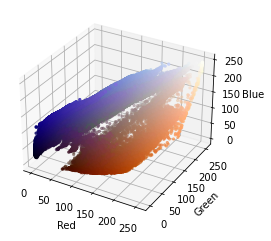

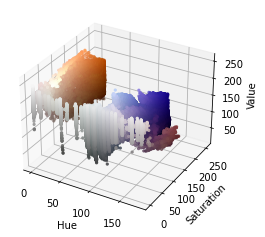

In [19]:
# Never run this again; it takes too long
r, g, b = cv2.split(image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = image.reshape((np.shape(image)[0]*np.shape(image)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

h, s, v = cv2.split(hsv_image)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [56]:
#red_image = cv2.imencode('.jpg', red_image)

blurred = cv2.GaussianBlur(th3, (5, 5), 0)

cv2.imwrite("blurred-image.jpg", blurred)

edges = cv2.Canny(binary, 50, 200)

cv2.imwrite("edges-blurred.jpg", edges)

#print(gray.shape, wide.shape)

dst = cv2.addWeighted(binary,0.5,edges,0.9,0)

cv2.imwrite("overlayed-wide.jpg", dst)

True

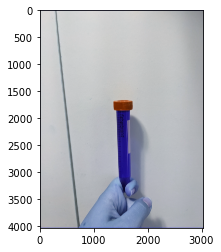

In [34]:
contours_list, hierarchy = cv2.findContours(gray,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE) # Find contours 
# Draw first contour
first_contour = 0
second_contour = 1
 
contour1 = cv2.drawContours(image, contours_list, first_contour,(255,0,255),3)

x, y, w, h = cv2.boundingRect(contours_list[first_contour])
cv2.rectangle(contour1,(x,y), (x+w,y+h), (0,0,255), 5)

plt.imshow(contour1)

In [36]:
contours,hierarchy = cv2.findContours(gray, 1, 2)

# This function allows us to create a descending sorted list of contour areas.
def contour_area(contours):
     
    # create an empty list
    cnt_area = []
     
    # loop through all the contours
    for i in range(0,len(contours),1):
        # for each contour, use OpenCV to calculate the area of the contour
        cnt_area.append(cv2.contourArea(contours[i]))
 
    # Sort our list of contour areas in descending order
    list.sort(cnt_area, reverse=True)
    return cnt_area

def draw_bounding_box(contours, image, number_of_boxes=1):
    # Call our function to get the list of contour areas
    cnt_area = contour_area(contours)
 
    # Loop through each contour of our image
    for i in range(0,len(contours),1):
        cnt = contours[i]
 
        # Only draw the the largest number of boxes
        if (cv2.contourArea(cnt) > cnt_area[number_of_boxes]):
             
            # Use OpenCV boundingRect function to get the details of the contour
            x,y,w,h = cv2.boundingRect(cnt)
             
            # Draw the bounding box
            image=cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
 
    return image

plt.imshow(draw_bounding_box(contours, image))

IndexError: list index out of range

Number of Contours found = 15


True

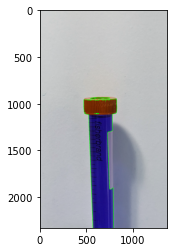

In [59]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edges, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
plt.imshow(edges)
  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)
cv2.imwrite("bounded.jpg", image)

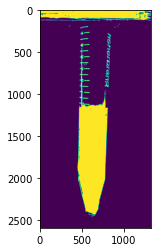

In [70]:
image = cv2.imread("images/PXL_20230607_004851472.MP~2.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

ret, binary = cv2.threshold(cv2.medianBlur(gray,5), 140, 255, 
  cv2.THRESH_BINARY_INV)

plt.imshow(binary)

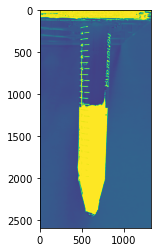

In [71]:
dst = cv2.addWeighted(gray,0.5,binary,0.9,0)

plt.imshow(dst)

In [55]:
# 0.5 ml = 14.906 mm
# 0.75 ml = 18.31
# 1 ml = 20 mm
# 1.5 ml = 23 mm
vol_to_mm = [14.906, 18.31, 20, 23]
print(vol_to_mm[1]-vol_to_mm[0])
print(vol_to_mm[2]-vol_to_mm[1])
print(vol_to_mm[3]-vol_to_mm[2])

3.403999999999998
1.6900000000000013
3


In [117]:
print(best_conversion_vals)
print(sum(best_conversion_vals)/len(best_conversion_vals))

[0.02127346073226526, 0.018875268296262678, 0.01794247929828134, 0.01768037379340422, 0.01691958425802085, 0.016807149381480476]
0.018249719293285806


5.5
['2023_06_28_T220656_dinolite-t-0.05-o-0.5-f-350-0.0mL.jpg', '2023_06_28_T220806_dinolite-t-0.05-o-0.5-f-350-0.1mL.jpg', '2023_06_28_T220840_dinolite-t-0.05-o-0.5-f-350-0.2mL.jpg', '2023_06_28_T220909_dinolite-t-0.05-o-0.5-f-350-0.3mL.jpg', '2023_06_28_T220941_dinolite-t-0.05-o-0.5-f-350-0.4mL.jpg', '2023_06_28_T221008_dinolite-t-0.05-o-0.5-f-350-0.5mL.jpg', '2023_06_28_T221039_dinolite-t-0.05-o-0.5-f-350-0.6mL.jpg', '2023_06_28_T221204_dinolite-t-0.05-o-0.5-f-350-0.7mL.jpg', '2023_06_28_T221243_dinolite-t-0.05-o-0.5-f-350-0.8mL.jpg', '2023_06_28_T221319_dinolite-t-0.05-o-0.5-f-350-0.9mL.jpg', '2023_06_28_T221357_dinolite-t-0.05-o-0.5-f-350-1.0mL.jpg', '2023_06_28_T221427_dinolite-t-0.05-o-0.5-f-350-1.1mL.jpg', '2023_06_28_T221453_dinolite-t-0.05-o-0.5-f-350-1.2mL.jpg', '2023_06_28_T221521_dinolite-t-0.05-o-0.5-f-350-1.3mL.jpg', '2023_06_28_T221548_dinolite-t-0.05-o-0.5-f-350-1.4mL.jpg', '2023_06_28_T221615_dinolite-t-0.05-o-0.5-f-350-1.5mL.jpg', '2023_06_28_T221718_dinolite-t-0.05

bottom: 505 1546 811
top of fluid level: 505 1546
top of tube: 0 0
bottom 2: 1437 857
top of fluid level 2: 842 1271
top of tube 2: 0 0
Tube two:
volume of cone: 1.5
top of tube: 0
1437
fluid level height: 595
tube height non cone, fluid non cone, non cone volume: 855.6875 365 12.0
cone height: 230
mm to pixels: 0.1
mm to pixels: 0.10278260869565217
ml per pixel: 0.01402381126287342
top cone y: 1207
Fluid level at or above cone section, good!
volume (mL:) 6.618691110948799
Delta Volume (mL:) -0.1186911109487987
Index: 857
150.0
1418 1426 53 11
Index: 1271
351.0
1485 824 44 18
Index: 0
5.0
1433 1942 6 2
True Volume: 7.0
path: 2023_06_28_T222246_dinolite-t-0.05-o-0.5-f-350-7.0mL.jpg
bottom: 505 1715 808
top of fluid level: 505 1715
top of tube: 0 0
bottom 2: 1438 920
top of fluid level 2: 803 1410
top of tube 2: 0 0
Tube two:
volume of cone: 1.5
top of tube: 0
1438
fluid level height: 635
tube height non cone, fluid non cone, non cone volume: 855.6875 405 12.0
cone height: 230
mm to pixe

bottom: 516 1547 866
top of fluid level: 516 1547
top of tube: 0 0
bottom 2: 1442 859
top of fluid level 2: 509 1550
top of tube 2: 0 0
Tube two:
volume of cone: 1.5
top of tube: 0
1442
fluid level height: 933
tube height non cone, fluid non cone, non cone volume: 855.6875 703 12.0
cone height: 230
mm to pixels: 0.1
mm to pixels: 0.10278260869565217
ml per pixel: 0.01402381126287342
top cone y: 1212
Fluid level at or above cone section, good!
volume (mL:) 11.358739317800016
Delta Volume (mL:) 1.1412606821999844
Index: 859
171.0
1428 1431 58 11
Index: 1550
147.0
1274 494 51 15
Index: 0
6.0
2400 1942 7 2
True Volume: 13.0
path: 2023_06_28_T211907_dinolite-t-0.05-o-0.5-f-350-13.0mL.jpg
bottom: 515 1592 866
top of fluid level: 515 1592
top of tube: 0 0
bottom 2: 1442 863
top of fluid level 2: 1365 926
top of tube 2: 0 0
Tube two:
volume of cone: 1.5
top of tube: 0
1442
fluid level height: 77
tube height non cone, fluid non cone, non cone volume: 855.6875 -153 12.0
cone height: 230
mm to pi

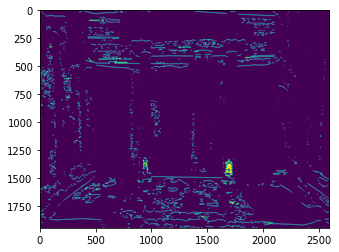

In [143]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import math
import os
import re

best_conversion_vals = []
volume_deltas = []

def get_cone_coefficient(fluid_height):
    #return 0.0776 + (-2.54*(10**-3))*fluid_height + (5.76*(10**-5))*(fluid_height**2) + (-6.55*(10**-7))*(fluid_height**3) + (3.86*(10**-9))*(fluid_height**4) + (-1.14*(10**-11))*(fluid_height**5) + (1.32*(10**-14))*(fluid_height**6)
    return 0.0401 + (-1.05*(10**-4))*fluid_height + (-5.37*(10**-8))*fluid_height**2 + (8.45*(10**-10))*fluid_height**3
    
def calculate_volume(fluid_level_y, bottom_y, top_of_tube, full_volume, image=None, inputted_fluid_volume=0, true_volume=None):
    #print("bottom:", contours[27])
    #print("top:", contours[38])

    # actually 450 microliters
    cone_volume = 2 - 0.50

    print("volume of cone:", cone_volume)

    # x,y,w,h = cv2.boundingRect(contours[27])
    # print("bottom:", x, y, w, h)

    # x,y,w,h = cv2.boundingRect(contours[38])
    # print("top:", x, y, w, h)

    print("top of tube:", top_of_tube)

    tube_height =  bottom_y - top_of_tube

    print(tube_height)

    fluid_level_height =  abs(bottom_y - fluid_level_y)

    # TODO: This seems to be over-estimated!
    print("fluid level height:", fluid_level_height)

    # cone section is 0.209 of the tube height visible at 13.2 mL

    #tube_height *= (1 - 0.209)

    # TODO: Update this
    cone_height = 230#tube_height * (0.219)

    non_cone_volume = full_volume - cone_volume

    fluid_non_cone = fluid_level_height - cone_height

    tube_height_non_cone = tube_height - cone_height
    tube_height_non_cone = 855.6875

    print("tube height non cone, fluid non cone, non cone volume:", tube_height_non_cone, fluid_non_cone, non_cone_volume)

    print("cone height:", cone_height)

    #print(fluid_level_height / tube_height)

    # radius per mm of height is 0.208

    radius_per_mm = 9.8/23.64

    # mm to pixel is 0.096

    #mm_to_pixels = 0.096

    mm_to_pixels = float(23.0 / cone_height)
    
    print("mm to pixels:", mm_to_pixels)
    
    cone_fluid_height = fluid_level_height
    
    if cone_fluid_height > cone_height:
        cone_fluid_height = cone_height
    
    if true_volume is not None:
        if true_volume < 1.5:
            mm_to_pixels = ((40 * (3/math.pi) ** (1/3)) * (true_volume) ** (1/3)) / (((23) ** (2/3)) * cone_fluid_height)
            print("Best mm_to_pixels val:", mm_to_pixels)
            best_conversion_vals.append(mm_to_pixels)
            #mm_to_pixels = get_cone_coefficient(cone_fluid_height)

#         x = mm_to_pixels * cone_fluid_height
#         print("Best radius_per_mm val:", math.sqrt(true_volume/math.pi*1000/x)/x)
#         radius_per_mm = math.sqrt(true_volume/math.pi*1000/x)/x
#         best_conversion_vals.append(radius_per_mm)
    
    # min_radius = 6.15

    mm_to_pixels = 23.64/cone_height
    
    print("mm to pixels:", mm_to_pixels)
    
    rel_height = 0
    fluid_volume = 0
    
    ml_per_pixel = non_cone_volume / tube_height_non_cone

    print("ml per pixel:", ml_per_pixel)

    top_cone_y = bottom_y - cone_height
    print("top cone y:", top_cone_y)

    if image is not None:
        imageCopy = image.copy()
        x = 0
        w = 2500

        # ml_y
        height = 0
        #fluid_volume = 12
        print("fluid volume:", inputted_fluid_volume)
        print("cone volume:", cone_volume)
        if inputted_fluid_volume > cone_volume:
            fluid_height = (inputted_fluid_volume - cone_volume) / ml_per_pixel
            print("fluid height:", fluid_height)
            height = top_cone_y - fluid_height
        elif fluid_volume == cone_volume:
            print("equal condition:")
            height = top_cone_y
        else:
            print("In cone:")
            height = bottom_y - ((40 * (3/math.pi) ** (1/3)) * (true_volume) ** (1/3)) / (((23) ** (2/3)) * mm_to_pixels)

        #height = top_cone_y
        print("height:", height)
        height = int(height)

        # Start coordinate, here (0, 0)
        # represents the top left corner of image
        start_point = (x, height)

        # End coordinate, here (250, 250)
        # represents the bottom right corner of image
        end_point = (w, height)

        # Green color in BGR
        color = (0, 255, 0)

        # Line thickness of 9 px
        thickness = 1

        img = cv2.line(imageCopy, start_point, end_point, color, thickness)

        start_point = (x, int(top_cone_y))

        # End coordinate, here (250, 250)
        # represents the bottom right corner of image
        end_point = (w, int(top_cone_y))

        img = cv2.line(img, start_point, end_point, color, thickness)

        plt.imshow(img)
        cv2.imwrite(f"test/line_estimate-{true_volume}.jpg", img)
        #img = cv2.rectangle(imageCopy,(x,y),(x+w,y+h),(0,255,0),2)
    
    # This is if the fluid level is at or above the top of the cone section of the tube.
    if fluid_non_cone >= 0:

        rel_height = fluid_non_cone / tube_height_non_cone
        fluid_volume = rel_height * non_cone_volume + cone_volume
        print("Fluid level at or above cone section, good!")
    else:
        print("Fluid level within cone section, low fluid level!")
        cone_fluid_height = fluid_level_height
        print("cone fluid height:", cone_fluid_height)
        fluid_volume = (math.pi*(radius_per_mm * (cone_fluid_height * mm_to_pixels))**2*((cone_fluid_height*mm_to_pixels)))/3/1000

        
    if cone_fluid_height == cone_height + 5 or cone_fluid_height == cone_height - 5:
        fluid_volume = cone_volume
    
    print("volume (mL:)", fluid_volume)
    print("Delta Volume (mL:)", true_volume-fluid_volume)
    volume_deltas.append((true_volume-fluid_volume, true_volume, fluid_volume, fluid_non_cone, tube_height_non_cone, non_cone_volume, cone_fluid_height))

full_volume = 13.5 # mL
full_volume_2 = 13.5 # mL
#calculate_volume(max_y_2, bottom_y_2, top_of_tube_2, full_volume_2, image, 13)

#calculate_volume(max_y, bottom_y, top_of_tube, full_volume, image, 4)
#image_paths = ["2023_06_20_T144847_dinolite-t-0.05-o-0.5-f-350_0.250mL.jpg", "2023_06_20_T144930_dinolite-t-0.05-o-0.5-f-350_0.500mL.jpg", "2023_06_20_T145614_dinolite-t-0.05-o-0.5-f-350_0.750mL.jpg", "2023_06_20_T145816_dinolite-t-0.05-o-0.5-f-350_1.000mL.jpg", "2023_06_20_T145931_dinolite-t-0.05-o-0.5-f-350_1.250mL.jpg", "2023_06_20_T150024_dinolite-t-0.05-o-0.5-f-350_1.500mL.jpg", "2023_06_20_T150112_dinolite-t-0.05-o-0.5-f-350_1.750mL.jpg", "2023_06_20_T150217_dinolite-t-0.05-o-0.5-f-350_2.000mL.jpg", "2023_06_20_T150316_dinolite-t-0.05-o-0.5-f-350_3.000mL.jpg", "2023_06_20_T150421_dinolite-t-0.05-o-0.5-f-350_4.000mL.jpg", ""]

image_path = "good-images/"

pattern = re.compile(r'([\d.]+)(?=mL\.jpg)')

#print(re.search(r"([\d\.]+)(?=mL\.jpg)", "2023_06_28_T211634_dinolite-t-0.05-o-0.5-f-350-11.5mL.jpg"))

image_paths = os.listdir(image_path)
print(pattern.search(image_paths[0]).group(0))
image_paths = sorted(image_paths, key=lambda x: float(pattern.search(x).group(0)))

print(image_paths)

tube_one_indices = []

tube_two_indices = []

for path in image_paths[16:-1]:
    #path = image_paths[7]
    true_volume = float(pattern.search(path).group(0))
    print("True Volume:", true_volume)
    image = cv2.imread(image_path + path)
    print("path:", path)

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    #blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(18, 18))
    return_image = clahe.apply(gray)

    cv2.imwrite("test/clahe-pre-binary.jpg", return_image)

    return_image = cv2.fastNlMeansDenoising(return_image, None, 10, 7, 21)
    #dst = cv2.fastNlMeansDenoising( img, None, 15, 7, 21 )  

    cv2.imwrite("test/denoising.jpg", return_image)

    # return_image = cv2.erode(return_image, morph_dilate_kernel_size, iterations = 3)

    # cv2.imwrite("test/clahe-pre-binary-erode.jpg", return_image)

    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    close = cv2.morphologyEx(return_image,cv2.MORPH_CLOSE,kernel1)
    div = np.float32(return_image)/(close)
    res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
    
    cv2.imwrite("test/div.jpg", div)
    cv2.imwrite("test/res.jpg", res)
    #break
    
    ret, binary = cv2.threshold(return_image, 120, 255, 
      cv2.THRESH_BINARY_INV)

#     th3 = cv2.adaptiveThreshold(cv2.medianBlur(gray,5),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#                 cv2.THRESH_BINARY_INV,11,2)

#     #image = cv2.cvtColor(image, cv2.COLOR_RGB2RGB)

#     cv2.imwrite("test/adpt-thresh-image.jpg", th3)

    dst = cv2.addWeighted(return_image,0.5,binary,0.9,0)

    cv2.imwrite("test/overlayed-blurred-binary.jpg", dst)

    #plt.imshow(binary)

    cv2.imwrite("test/binary-image.jpg", binary)

    # find the contours
    #cv2.imwrite("test/blurred-image.jpg", blurred)

    blurred = cv2.GaussianBlur(binary, (5, 5), 0)
    edges = cv2.Canny(blurred, 40, 180)

    cv2.imwrite("test/edges-denoised.jpg", edges)

    plt.imshow(edges)

    morph_dilate_kernel_size = (7, 7)
    morph_rect_kernel_size = (6, 1)

    # sigma=0.33
    # median = np.median(return_image)
    # # find bounds for Canny edge detection using the computed median
    # lower = int(max(0, (1.0 - sigma) * median))
    # upper = int(min(255, (1.0 + sigma) * median))

    # print("lower:", lower, " upper:", upper)

    # edges = cv2.Canny(return_image, lower, upper)

    # cv2.imwrite("test/edges-clahe.jpg", edges)

    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    return_image = clahe.apply(edges)

    cv2.imwrite("test/clahe-image.jpg", return_image)

    #eroded_image = cv2.erode(edges, (1,1), iterations = 1)

    #cv2.imwrite("test/erode-stuff.jpg", eroded_image)

    return_image = cv2.morphologyEx(edges, cv2.MORPH_DILATE, morph_dilate_kernel_size, iterations = 3)

    #return_image = cv2.morphologyEx(return_image, cv2.MORPH_GRADIENT, (5,5))

    #return_image = cv2.morphologyEx(return_image, cv2.MORPH_CLOSE, (25,25), iterations = 5)
    
    # create a horizontal structural element;
    horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, morph_rect_kernel_size)
    # to the edges, apply morphological opening operation to remove vertical lines from the contour image
    return_image = cv2.morphologyEx(return_image, cv2.MORPH_OPEN, horizontal_structure)

    #return_image = cv2.morphologyEx(return_image, cv2.MORPH_DILATE, morph_dilate_kernel_size, iterations = 3)
    
    #return_image = cv2.morphologyEx(return_image, cv2.MORPH_CLOSE, (21, 21), iterations = 3)

    cv2.imwrite(f"test/morpho-stuff-{true_volume}.jpg", return_image)
    #break
    # median = np.median(return_image)
    # # find bounds for Canny edge detection using the computed median
    # lower = int(max(0, (1.0 - sigma) * median))
    # upper = int(min(255, (1.0 + sigma) * median))

    # print("lower:", lower, " upper:", upper)

    # edges = cv2.Canny(return_image, lower, upper)

    # cv2.imwrite("test/edges-clahe-after.jpg", edges)

    #print(gray.shape, wide.shape)

    dst = cv2.addWeighted(gray,0.5,return_image,0.9,0)

    cv2.imwrite(f"test/overlayed-wide-{true_volume}.jpg", dst)

    contours, _ = cv2.findContours(return_image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    imageCopy = image.copy()

    # take the first contour
    max_area = 0
    max_index = 0
    max_height = 0
    max_height_index = 0

    max_ratio = 0
    max_ratio_index = 0

    max_width_ratio = 0
    max_width_ratio_index = 0

    max_width_y = 0

    max_height_y = 0
    min_height_y = 0

    max_y = 0
    max_y_index = 0

    top_of_tube = 0
    top_of_tube_index = 0

    # Second Tube

    max_height_2 = 0
    max_height_index_2 = 0

    max_y_2 = 0
    max_y_index_2 = 0

    top_of_tube_2 = 0
    top_of_tube_index_2 = 0
    
    top_of_tube_y_limit = 360

    # first tube x start = 1050, end is 1325
    # second tube x start = 1325, end is 1600
    tube_one_start_x = 1050
    tube_one_end_x = 1325
    tube_two_start_x = 1270
    tube_two_end_x = 1600

    min_fluid_line_width = 40
    max_fluid_line_width = 90
    center_bottom = 0

    for i in range(0, len(contours)):

        imageCopy = image.copy()

        cnt = contours[i]

    #     area = cv2.contourArea(cnt)
    #     if area > max_area:
    #         max_area = area
    #         max_index = i

        # compute the bounding rectangle of the contour
        x,y,w,h = cv2.boundingRect(cnt)

        # draw contour
        #img = cv2.drawContours(imageCopy,[cnt],0,(0,255,255),2)

        # draw the bounding rectangle
        #img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    #     # compute rotated rectangle (minimum area)
    #     rect = cv2.minAreaRect(cnt)
    #     box = cv2.boxPoints(rect)
    #     box = np.int0(box)

    #     # draw minimum area rectangle (rotated rectangle)
    #     img = cv2.drawContours(imageCopy,[box],0,(0,255,255),2)
    #     # compute rotated rectangle (minimum area)
    #     rect = cv2.minAreaRect(cnt)
    #     box = cv2.boxPoints(rect)
    #     box = np.int0(box)

        #print("box:", box)

        # draw minimum area rectangle (rotated rectangle)
        #img = cv2.drawContours(img,[box],0,(0,255,255),2)
        center = x - w
        # First Tube
#         if y+h > top_of_tube and y < top_of_tube_y_limit and y > 250 and x > tube_one_start_x and x < tube_one_end_x and w > 20:
#             top_of_tube = y
#             top_of_tube_index = i

        if y+h > max_y and y > 300 and y < 1400 and w > min_fluid_line_width and x > tube_one_start_x and x < tube_one_end_x:
            max_y = y+h
            max_y_index = i

        if y+h > max_height and y+h > 300 and y+h < 1440 and x > tube_one_start_x and x < tube_one_end_x and w > 20:
            max_height = y+h
            max_height_index = i
            center_bottom = center

        # Second Tube
#         if y > top_of_tube_2 and y < top_of_tube_y_limit and y > 250 and x > tube_two_start_x and x < tube_two_end_x and w > 20:
#             top_of_tube_2 = y
#             top_of_tube_index_2 = i

        if y+h > max_y_2 and y+h > 300 and y+h < 1400 and w > min_fluid_line_width and x > tube_two_start_x and x < tube_two_end_x:
            max_y_2 = y+h
            max_y_index_2 = i

        if y > max_height_2 and y > 300 and y < 1440 and x > tube_two_start_x and x < tube_two_end_x and w > 20:
            max_height_2 = y+h
            max_height_index_2 = i

    #     if h/w > max_ratio and h > 200 and area > 10:
    #         max_ratio = h/w
    #         max_ratio_index = i
    #         max_height_y = y+h
    #         min_height_y = y

    #     if w/h > max_width_ratio and w > 300:
    #         max_width_ratio = h/w
    #         max_width_ratio_index = i
    #         max_width_y = y+h

        # display the image with bounding rectangle drawn on it
        #plt.imshow(img)

        #cv2.imwrite("bounded.jpg", img)

        #print(y+h)

    # Tube One

    # TODO: Handle zero volume

    bottom_y = max_height
    bottom_y_index = max_height_index
    #print(max_area, max_index)
    print("bottom:", bottom_y, bottom_y_index, center_bottom)
    #print(max_ratio, max_ratio_index)
    #print(max_width_ratio, "index:", max_width_ratio_index)
    #print("y coordinate of top edge of holder:", max_width_y, " top of fluid level y:", max_height_y, " bottom of fluid level:", min_height_y)
    print("top of fluid level:", max_y, max_y_index)

    print("top of tube:", top_of_tube, top_of_tube_index)

    imageCopy = image.copy()
    
    tube_one_indices.append((bottom_y_index, max_y_index, top_of_tube_index, imageCopy, contours))

    # Tube Two
    bottom_y_2 = max_height_2
    bottom_y_index_2 = max_height_index_2
    #print(max_area, max_index)
    print("bottom 2:", bottom_y_2, bottom_y_index_2)
    #print(max_ratio, max_ratio_index)
    #print(max_width_ratio, "index:", max_width_ratio_index)
    #print("y coordinate of top edge of holder:", max_width_y, " top of fluid level y:", max_height_y, " bottom of fluid level:", min_height_y)
    print("top of fluid level 2:", max_y_2, max_y_index_2)

    print("top of tube 2:", top_of_tube_2, top_of_tube_index_2)

    tube_two_indices.append((bottom_y_index_2, max_y_index_2, top_of_tube_index_2, imageCopy, contours))

    # tube_height = max_height_y - max_width_y

    # rel_height = min_height_y / tube_height

    # print(tube_height, rel_height)

    plt.imshow(return_image)

    #print("Tube one:")
    #calculate_volume(max_y, bottom_y, top_of_tube, full_volume, true_volume=true_volume)
    #break
    #calculate_volume(max_y, bottom_y, top_of_tube, full_volume, image, true_volume, true_volume=true_volume)
    #break
    print("Tube two:")
    calculate_volume(max_y_2, bottom_y_2, top_of_tube_2, full_volume_2, true_volume=true_volume)
    #calculate_volume(max_y_2, bottom_y_2, top_of_tube_2, full_volume_2, image, true_volume, true_volume=true_volume)
    cv2.imwrite(f"test/bounded_2-{true_volume}.jpg", show_contours((bottom_y_index_2, max_y_index_2, top_of_tube_index_2, imageCopy), contours))
    #break

In [149]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

import math
import os
import re

best_conversion_vals = []
volume_deltas = []

def get_cone_coefficient(fluid_height):
    #return 0.0776 + (-2.54*(10**-3))*fluid_height + (5.76*(10**-5))*(fluid_height**2) + (-6.55*(10**-7))*(fluid_height**3) + (3.86*(10**-9))*(fluid_height**4) + (-1.14*(10**-11))*(fluid_height**5) + (1.32*(10**-14))*(fluid_height**6)
    return 0.0401 + (-1.05*(10**-4))*fluid_height + (-5.37*(10**-8))*fluid_height**2 + (8.45*(10**-10))*fluid_height**3
    
def calculate_volume(fluid_level_y, bottom_y, top_of_tube, full_volume, image=None, inputted_fluid_volume=0, true_volume=None):
    #print("bottom:", contours[27])
    #print("top:", contours[38])

    # actually 450 microliters
    cone_volume = 2 - 0.50

    #print("volume of cone:", cone_volume)

    # x,y,w,h = cv2.boundingRect(contours[27])
    # print("bottom:", x, y, w, h)

    # x,y,w,h = cv2.boundingRect(contours[38])
    # print("top:", x, y, w, h)

    #print("top of tube:", top_of_tube)

    tube_height =  bottom_y - top_of_tube

    #print(tube_height)

    fluid_level_height =  abs(bottom_y - fluid_level_y)

    # TODO: This seems to be over-estimated!
    #print("fluid level height:", fluid_level_height)

    # cone section is 0.209 of the tube height visible at 13.2 mL

    #tube_height *= (1 - 0.209)

    # TODO: Update this
    cone_height = 230#tube_height * (0.219)

    non_cone_volume = full_volume - cone_volume

    fluid_non_cone = fluid_level_height - cone_height

    tube_height_non_cone = tube_height - cone_height
    tube_height_non_cone = 855.6875

    #print("tube height non cone, fluid non cone, non cone volume:", tube_height_non_cone, fluid_non_cone, non_cone_volume)

    #print("cone height:", cone_height)

    #print(fluid_level_height / tube_height)

    # radius per mm of height is 0.208

    radius_per_mm = 9.8/23.64

    # mm to pixel is 0.096

    #mm_to_pixels = 0.096

    mm_to_pixels = float(23.0 / cone_height)
    
    #print("mm to pixels:", mm_to_pixels)
    
    cone_fluid_height = fluid_level_height
    
    if cone_fluid_height > cone_height:
        cone_fluid_height = cone_height
    
    if true_volume is not None:
        if true_volume < 1.5:
            mm_to_pixels = ((40 * (3/math.pi) ** (1/3)) * (true_volume) ** (1/3)) / (((23) ** (2/3)) * cone_fluid_height)
            #print("Best mm_to_pixels val:", mm_to_pixels)
            best_conversion_vals.append(mm_to_pixels)
            #mm_to_pixels = get_cone_coefficient(cone_fluid_height)

#         x = mm_to_pixels * cone_fluid_height
#         print("Best radius_per_mm val:", math.sqrt(true_volume/math.pi*1000/x)/x)
#         radius_per_mm = math.sqrt(true_volume/math.pi*1000/x)/x
#         best_conversion_vals.append(radius_per_mm)
    
    # min_radius = 6.15

    mm_to_pixels = 23.64/cone_height
    
    #print("mm to pixels:", mm_to_pixels)
    
    rel_height = 0
    fluid_volume = 0
    
    ml_per_pixel = non_cone_volume / tube_height_non_cone

    #print("ml per pixel:", ml_per_pixel)

    top_cone_y = bottom_y - cone_height
    #print("top cone y:", top_cone_y)

    if image is not None:
        imageCopy = image.copy()
        x = 0
        w = 2500

        # ml_y
        height = 0
        #fluid_volume = 12
        #print("fluid volume:", inputted_fluid_volume)
        #print("cone volume:", cone_volume)
        if inputted_fluid_volume > cone_volume:
            fluid_height = (inputted_fluid_volume - cone_volume) / ml_per_pixel
            #print("fluid height:", fluid_height)
            height = top_cone_y - fluid_height
        elif fluid_volume == cone_volume:
            #print("equal condition:")
            height = top_cone_y
        else:
            #print("In cone:")
            height = bottom_y - ((40 * (3/math.pi) ** (1/3)) * (true_volume) ** (1/3)) / (((23) ** (2/3)) * mm_to_pixels)

        #height = top_cone_y
        #print("height:", height)
        height = int(height)

        # Start coordinate, here (0, 0)
        # represents the top left corner of image
        start_point = (x, height)

        # End coordinate, here (250, 250)
        # represents the bottom right corner of image
        end_point = (w, height)

        # Green color in BGR
        color = (0, 255, 0)

        # Line thickness of 9 px
        thickness = 1

        img = cv2.line(imageCopy, start_point, end_point, color, thickness)

        start_point = (x, int(top_cone_y))

        # End coordinate, here (250, 250)
        # represents the bottom right corner of image
        end_point = (w, int(top_cone_y))

        img = cv2.line(img, start_point, end_point, color, thickness)

        plt.imshow(img)
        cv2.imwrite(f"test/line_estimate-{true_volume}.jpg", img)
        #img = cv2.rectangle(imageCopy,(x,y),(x+w,y+h),(0,255,0),2)
    
    # This is if the fluid level is at or above the top of the cone section of the tube.
    if fluid_non_cone >= 0:

        rel_height = fluid_non_cone / tube_height_non_cone
        fluid_volume = rel_height * non_cone_volume + cone_volume
        #print("Fluid level at or above cone section, good!")
    else:
        #print("Fluid level within cone section, low fluid level!")
        cone_fluid_height = fluid_level_height
        #print("cone fluid height:", cone_fluid_height)
        fluid_volume = (math.pi*(radius_per_mm * (cone_fluid_height * mm_to_pixels))**2*((cone_fluid_height*mm_to_pixels)))/3/1000

        
    if cone_fluid_height == cone_height + 5 or cone_fluid_height == cone_height - 5:
        fluid_volume = cone_volume
    
    print("volume (mL:)", fluid_volume)
    if true_volume is not None:
        print("Delta Volume (mL:)", true_volume-fluid_volume)
        volume_deltas.append((true_volume-fluid_volume, true_volume, fluid_volume, fluid_non_cone, tube_height_non_cone, non_cone_volume, cone_fluid_height))
    else:
        volume_deltas.append((math.nan, math.nan, fluid_volume, fluid_non_cone, tube_height_non_cone, non_cone_volume, cone_fluid_height))
            
    return fluid_volume
    
def show_contours(indices, contours=None):
    imageCopy = indices[3].copy()

    if contours is None:
        contours = indices[4]
    
    img = None

    for index in indices[0:3]:
        cnt = contours[index]
        #print("Index:", index)
        # compute the bounding rectangle of the contour
        #print(cv2.contourArea(cnt))
        x,y,w,h = cv2.boundingRect(cnt)
        #print(x, y, w, h)

        # draw contour
        img = cv2.drawContours(imageCopy,[cnt],0,(0,255,255),2)

        # draw the bounding rectangle
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

    return img
    
full_volume = 13.5 # mL
full_volume_2 = 13.5 # mL

tube_one_indices = []

tube_two_indices = []
def get_fluid_volume(path):

    try:
        os.mkdir("test")
    except Exception as e:
        pass
    #true_volume = float(pattern.search(path).group(0))
    #print("True Volume:", true_volume)
    image = cv2.imread(path)
    print("path:", path)

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(18, 18))
    return_image = clahe.apply(gray)

    cv2.imwrite("test/clahe-pre-binary.jpg", return_image)

    return_image = cv2.fastNlMeansDenoising(return_image, None, 10, 7, 21)

    cv2.imwrite("test/denoising.jpg", return_image)

    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    close = cv2.morphologyEx(return_image,cv2.MORPH_CLOSE,kernel1)
    div = np.float32(return_image)/(close)
    res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
    
    ret, binary = cv2.threshold(return_image, 120, 255, 
      cv2.THRESH_BINARY_INV)

    dst = cv2.addWeighted(return_image,0.5,binary,0.9,0)

    cv2.imwrite("test/overlayed-blurred-binary.jpg", dst)


    cv2.imwrite("test/binary-image.jpg", binary)

    # find the contours

    blurred = cv2.GaussianBlur(binary, (5, 5), 0)
    edges = cv2.Canny(blurred, 40, 180)

    cv2.imwrite("test/edges-denoised.jpg", edges)

    morph_dilate_kernel_size = (7, 7)
    morph_rect_kernel_size = (6, 1)

    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    return_image = clahe.apply(edges)

    cv2.imwrite("test/clahe-image.jpg", return_image)
    
    return_image = cv2.morphologyEx(edges, cv2.MORPH_DILATE, morph_dilate_kernel_size, iterations = 3)
    
    # create a horizontal structural element;
    horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, morph_rect_kernel_size)
    # to the edges, apply morphological opening operation to remove vertical lines from the contour image
    return_image = cv2.morphologyEx(return_image, cv2.MORPH_OPEN, horizontal_structure)

    cv2.imwrite(f"test/morpho-stuff-{true_volume}.jpg", return_image)
    dst = cv2.addWeighted(gray,0.5,return_image,0.9,0)

    cv2.imwrite(f"test/overlayed-wide-{true_volume}.jpg", dst)

    contours, _ = cv2.findContours(return_image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    imageCopy = image.copy()

    # take the first contour
    max_area = 0
    max_index = 0
    max_height = 0
    max_height_index = 0

    max_ratio = 0
    max_ratio_index = 0

    max_width_ratio = 0
    max_width_ratio_index = 0

    max_width_y = 0

    max_height_y = 0
    min_height_y = 0

    max_y = 0
    max_y_index = 0

    top_of_tube = 0
    top_of_tube_index = 0

    # Second Tube

    max_height_2 = 0
    max_height_index_2 = 0

    max_y_2 = 0
    max_y_index_2 = 0

    top_of_tube_2 = 0
    top_of_tube_index_2 = 0
    
    top_of_tube_y_limit = 360

    # first tube x start = 1050, end is 1325
    # second tube x start = 1325, end is 1600
    tube_one_start_x = 1050
    tube_one_end_x = 1325
    tube_two_start_x = 1270
    tube_two_end_x = 1600

    min_fluid_line_width = 40
    max_fluid_line_width = 90
    center_bottom = 0

    for i in range(0, len(contours)):

        imageCopy = image.copy()

        cnt = contours[i]

        # compute the bounding rectangle of the contour
        x,y,w,h = cv2.boundingRect(cnt)

        center = x - w

        if y+h > max_y and y > 300 and y < 1400 and w > min_fluid_line_width and x > tube_one_start_x and x < tube_one_end_x:
            max_y = y+h
            max_y_index = i

        if y+h > max_height and y+h > 300 and y+h < 1440 and x > tube_one_start_x and x < tube_one_end_x and w > 20:
            max_height = y+h
            max_height_index = i
            center_bottom = center

        if y+h > max_y_2 and y+h > 300 and y+h < 1400 and w > min_fluid_line_width and x > tube_two_start_x and x < tube_two_end_x:
            max_y_2 = y+h
            max_y_index_2 = i

        if y > max_height_2 and y > 300 and y < 1440 and x > tube_two_start_x and x < tube_two_end_x and w > 20:
            max_height_2 = y+h
            max_height_index_2 = i

    # TODO: Handle zero volume

    bottom_y = max_height
    bottom_y_index = max_height_index

    imageCopy = image.copy()
    
    tube_one_indices.append((bottom_y_index, max_y_index, top_of_tube_index, imageCopy, contours))

    bottom_y_2 = max_height_2
    bottom_y_index_2 = max_height_index_2

    tube_two_indices.append((bottom_y_index_2, max_y_index_2, top_of_tube_index_2, imageCopy, contours))

    fluid_volume = calculate_volume(max_y_2, bottom_y_2, top_of_tube_2, full_volume_2)
    
    cv2.imwrite(f"test/bounded_2-{fluid_volume}.jpg", show_contours((bottom_y_index_2, max_y_index_2, top_of_tube_index_2, imageCopy), contours))
    
get_fluid_volume("good-images/2023_06_28_T211332_dinolite-t-0.05-o-0.5-f-350-10.0mL.jpg")

path: good-images/2023_06_28_T211332_dinolite-t-0.05-o-0.5-f-350-10.0mL.jpg
volume (mL:) 10.222810605507267


In [133]:
image = cv2.imread("good-images/2023_06_28_T211332_dinolite-t-0.05-o-0.5-f-350-10.0mL.jpg")

# The kernel to be used for dilation 
# purpose
kernel = np.ones((5, 5), np.uint8)
  
# converting the image to HSV format
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  
# defining the lower and upper values
# of HSV, this will detect yellow colour
Upper_hsv = np.array([272,63,79])
Lower_hsv = np.array([266,68,65])
  
# creating the mask
Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)

cv2.imwrite("test/mask.jpg", Mask)

True

In [98]:
print(len(best_conversion_vals)-1)

14


In [120]:
for i in range(1, len(best_conversion_vals)):
    print(volume_deltas[i][6])

69
72
110
139
145
166
177
186
195
204
214
225
230
230


In [119]:
for i in range(1, len(best_conversion_vals)):
    print(best_conversion_vals[i])

0.03276293528016154
0.039558765490159783
0.029640097488706784
0.025816880123174946
0.026659616260279375
0.02474614519376725
0.02443194122612232
0.024307984240119852
0.024114492130078338
0.023874542635904973
0.023493570038535652
0.023002575167739757
0.02311098785873821
0.023689000505146517


In [118]:
for i in range(1, len(best_conversion_vals)):
    print(best_conversion_vals[i], volume_deltas[i][6])

0.03276293528016154 69
0.039558765490159783 72
0.029640097488706784 110
0.025816880123174946 139
0.026659616260279375 145
0.02474614519376725 166
0.02443194122612232 177
0.024307984240119852 186
0.024114492130078338 195
0.023874542635904973 204
0.023493570038535652 214
0.023002575167739757 225
0.02311098785873821 230
0.023689000505146517 230


In [100]:
for i in range(15, len(volume_deltas)):
    print(volume_deltas[i][2])

1.7523364485981308
2.3421052631578947
2.6789473684210527
3.170175438596491
3.66140350877193
4.124561403508772
4.654205607476635
5.135087719298246
5.593457943925234
6.117543859649123
6.616822429906542
7.177570093457944
7.745614035087719
7.9982456140350875
8.643859649122806
9.014150943396226
9.078947368421051
9.709059233449478
0.08921069217754551
10.17906976744186
0.08577989501159874
0.08577989501159874
0.08921069217754551
11.355140186915888
11.703508771929826
0.08921069217754551


In [142]:
for i in range(0, len(volume_deltas)):
    print(volume_deltas[i][0])

-0.3414286757724052
-0.17800014608136738
-0.1688335402819372
-0.15966693448250702
-0.12245270615732906
-0.15535753414651943
-0.13216711708421602
-0.09495288875903896
-0.11383390548535566
-0.1186911109487987
-0.1796435614637355
-0.2405960119786723
0.006975385289605285
-0.13811993280257084
-0.44664378058578613
-0.07285808195164734
-0.26002483383244446
-0.2228106055072665
10.410789307822455
10.9142201049884
11.4142201049884
11.910789307822455
1.1412606821999844
12.910789307822455


In [141]:
for i in range(0, len(volume_deltas)):
    print(volume_deltas[i][0], volume_deltas[i][1])

-0.3414286757724052 2.0
-0.17800014608136738 2.5
-0.1688335402819372 3.0
-0.15966693448250702 3.5
-0.12245270615732906 4.0
-0.15535753414651943 4.5
-0.13216711708421602 5.0
-0.09495288875903896 5.5
-0.11383390548535566 6.0
-0.1186911109487987 6.5
-0.1796435614637355 7.0
-0.2405960119786723 7.5
0.006975385289605285 8.0
-0.13811993280257084 8.5
-0.44664378058578613 8.5
-0.07285808195164734 9.0
-0.26002483383244446 9.5
-0.2228106055072665 10.0
10.410789307822455 10.5
10.9142201049884 11.0
11.4142201049884 11.5
11.910789307822455 12.0
1.1412606821999844 12.5
12.910789307822455 13.0


In [102]:
for i in range(15, len(volume_deltas)):
    print(volume_deltas[i][3])

18
60
84
119
154
187
225
259
292
329
365
405
445
463
509
531
540
589
-153
622
-154
-154
-153
703
727
-153


In [103]:
for i in range(15, len(volume_deltas)):
    print(volume_deltas[i][1])

1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
8.5
9.0
9.5
10.0
10.0
11.0
11.0
12.0
12.0
13.0
13.0


In [104]:
print(best_conversion_vals)
print(volume_deltas)

[0.0, 0.03276293528016154, 0.039558765490159783, 0.029640097488706784, 0.025816880123174946, 0.026659616260279375, 0.02474614519376725, 0.02443194122612232, 0.024307984240119852, 0.024114492130078338, 0.023874542635904973, 0.023493570038535652, 0.023002575167739757, 0.02311098785873821, 0.023689000505146517]
[(-0.02909191716549831, 0.0, 0.02909191716549831, -177, 847, 12.0), (0.03580635950401552, 0.1, 0.06419364049598449, -161, 856, 12.0), (0.12706395280541716, 0.2, 0.07293604719458285, -158, 840, 12.0), (0.039910518432812014, 0.3, 0.260089481567188, -120, 844, 12.0), (-0.12479433012546204, 0.4, 0.5247943301254621, -91, 855, 12.0), (-0.09572899755279385, 0.5, 0.5957289975527938, -85, 846, 12.0), (-0.2938589595603768, 0.6, 0.8938589595603768, -64, 855, 12.0), (-0.3835888626140216, 0.7, 1.0835888626140215, -53, 854, 12.0), (-0.45742927197558947, 0.8, 1.2574292719755895, -44, 853, 12.0), (-0.5489338802670948, 0.9, 1.4489338802670948, -35, 853, 12.0), (-0.6589574067915998, 1.0, 1.658957406

In [105]:
for i in range(15, len(volume_deltas)):
    print(volume_deltas[i][4])

856
855
855
855
855
855
856
855
856
855
856
856
855
855
855
848
855
861
859
860
857
857
857
856
855
856


In [106]:
for i in range(15, len(volume_deltas)):
    print(volume_deltas[i][5])

12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0


In [107]:
for i in range(15, len(volume_deltas)):
    print(volume_deltas[i][3])

18
60
84
119
154
187
225
259
292
329
365
405
445
463
509
531
540
589
-153
622
-154
-154
-153
703
727
-153


In [108]:
for i in range(15, len(volume_deltas)):
    print(volume_deltas[i][0], volume_deltas[i][1], volume_deltas[i][2], volume_deltas[i][3], volume_deltas[i][4], volume_deltas[i][5])

-0.25233644859813076 1.5 1.7523364485981308 18 856 12.0
-0.3421052631578947 2.0 2.3421052631578947 60 855 12.0
-0.17894736842105274 2.5 2.6789473684210527 84 855 12.0
-0.1701754385964911 3.0 3.170175438596491 119 855 12.0
-0.16140350877192988 3.5 3.66140350877193 154 855 12.0
-0.1245614035087721 4.0 4.124561403508772 187 855 12.0
-0.15420560747663536 4.5 4.654205607476635 225 856 12.0
-0.13508771929824626 5.0 5.135087719298246 259 855 12.0
-0.09345794392523388 5.5 5.593457943925234 292 856 12.0
-0.11754385964912295 6.0 6.117543859649123 329 855 12.0
-0.11682242990654235 6.5 6.616822429906542 365 856 12.0
-0.17757009345794383 7.0 7.177570093457944 405 856 12.0
-0.24561403508771917 7.5 7.745614035087719 445 855 12.0
0.0017543859649125082 8.0 7.9982456140350875 463 855 12.0
-0.14385964912280613 8.5 8.643859649122806 509 855 12.0
-0.5141509433962259 8.5 9.014150943396226 531 848 12.0
-0.07894736842105132 9.0 9.078947368421051 540 855 12.0
-0.2090592334494783 9.5 9.709059233449478 589 861 1

In [115]:
for i in range(1, len(best_conversion_vals)):
    print(volume_deltas[i][0])

0.03580635950401552
0.12706395280541716
0.039910518432812014
-0.12479433012546204
-0.09572899755279385
-0.2938589595603768
-0.3835888626140216
-0.45742927197558947
-0.5489338802670948
-0.6589574067915998
-0.8150761759129237
-1.0258315183893696
-0.24205607476635516
-0.24018691588785046


In [116]:
for i in range(1, len(best_conversion_vals)):
    print(volume_deltas[i][3])

-161
-158
-120
-91
-85
-64
-53
-44
-35
-26
-16
-5
3
10


In [114]:
for i in range(1, len(best_conversion_vals)):
    print(best_conversion_vals[i], volume_deltas[i][0], volume_deltas[i][1], volume_deltas[i][2], volume_deltas[i][3])

0.03276293528016154 0.03580635950401552 0.1 0.06419364049598449 -161
0.039558765490159783 0.12706395280541716 0.2 0.07293604719458285 -158
0.029640097488706784 0.039910518432812014 0.3 0.260089481567188 -120
0.025816880123174946 -0.12479433012546204 0.4 0.5247943301254621 -91
0.026659616260279375 -0.09572899755279385 0.5 0.5957289975527938 -85
0.02474614519376725 -0.2938589595603768 0.6 0.8938589595603768 -64
0.02443194122612232 -0.3835888626140216 0.7 1.0835888626140215 -53
0.024307984240119852 -0.45742927197558947 0.8 1.2574292719755895 -44
0.024114492130078338 -0.5489338802670948 0.9 1.4489338802670948 -35
0.023874542635904973 -0.6589574067915998 1.0 1.6589574067915998 -26
0.023493570038535652 -0.8150761759129237 1.1 1.9150761759129238 -16
0.023002575167739757 -1.0258315183893696 1.2 2.2258315183893695 -5
0.02311098785873821 -0.24205607476635516 1.3 1.5420560747663552 3
0.023689000505146517 -0.24018691588785046 1.4 1.6401869158878504 10


In [110]:
print([(d[0], d[1]) for d in volume_deltas])

[(-0.02909191716549831, 0.0), (0.03580635950401552, 0.1), (0.12706395280541716, 0.2), (0.039910518432812014, 0.3), (-0.12479433012546204, 0.4), (-0.09572899755279385, 0.5), (-0.2938589595603768, 0.6), (-0.3835888626140216, 0.7), (-0.45742927197558947, 0.8), (-0.5489338802670948, 0.9), (-0.6589574067915998, 1.0), (-0.8150761759129237, 1.1), (-1.0258315183893696, 1.2), (-0.24205607476635516, 1.3), (-0.24018691588785046, 1.4), (-0.25233644859813076, 1.5), (-0.3421052631578947, 2.0), (-0.17894736842105274, 2.5), (-0.1701754385964911, 3.0), (-0.16140350877192988, 3.5), (-0.1245614035087721, 4.0), (-0.15420560747663536, 4.5), (-0.13508771929824626, 5.0), (-0.09345794392523388, 5.5), (-0.11754385964912295, 6.0), (-0.11682242990654235, 6.5), (-0.17757009345794383, 7.0), (-0.24561403508771917, 7.5), (0.0017543859649125082, 8.0), (-0.14385964912280613, 8.5), (-0.5141509433962259, 8.5), (-0.07894736842105132, 9.0), (-0.2090592334494783, 9.5), (9.910789307822455, 10.0), (-0.17906976744185954, 10.0

In [111]:
print(sum([abs(d[0]) for d in volume_deltas[1:-1]])/len(volume_deltas))

1.3189576965613106


In [112]:
print(max([abs(d[0]) for d in volume_deltas[1:-1]]))

11.910789307822455


In [103]:
import os
print(os.listdir("calibration-images/f/output-fluid-level/images/backlight-and-flash"))

['2023_06_20_T150217_dinolite-t-0.05-o-0.5-f-350_2.000mL.jpg', '2023_06_20_T145931_dinolite-t-0.05-o-0.5-f-350_1.250mL.jpg', '2023_06_20_T150316_dinolite-t-0.05-o-0.5-f-350_3.000mL.jpg', '2023_06_20_T151037_dinolite-t-0.05-o-0.5-f-350_10.000mL.jpg', '2023_06_20_T144847_dinolite-t-0.05-o-0.5-f-350_0.250mL.jpg', '2023_06_20_T145614_dinolite-t-0.05-o-0.5-f-350_0.750mL.jpg', '2023_06_20_T150934_dinolite-t-0.05-o-0.5-f-350_9.000mL.jpg', '2023_06_20_T144930_dinolite-t-0.05-o-0.5-f-350_0.500mL.jpg', '2023_06_20_T151117_dinolite-t-0.05-o-0.5-f-350_11.000mL.jpg', '2023_06_20_T150421_dinolite-t-0.05-o-0.5-f-350_4.000mL.jpg', '2023_06_20_T150608_dinolite-t-0.05-o-0.5-f-350_5.000mL.jpg', '2023_06_20_T151200_dinolite-t-0.05-o-0.5-f-350_12.000mL.jpg', '2023_06_20_T150024_dinolite-t-0.05-o-0.5-f-350_1.500mL.jpg', '2023_06_20_T145816_dinolite-t-0.05-o-0.5-f-350_1.000mL.jpg', '2023_06_20_T150738_dinolite-t-0.05-o-0.5-f-350_7.000mL.jpg', '2023_06_20_T144757_dinolite-t-0.05-o-0.5-f-350_0.000mL.jpg', '202

In [12]:
#cnt = contours[341]

def show_contours(indices, contours=None):
    imageCopy = indices[3].copy()

    if contours is None:
        contours = indices[4]
    
    img = None

    for index in indices[0:3]:
        cnt = contours[index]
        print("Index:", index)
        # compute the bounding rectangle of the contour
        print(cv2.contourArea(cnt))
        x,y,w,h = cv2.boundingRect(cnt)
        print(x, y, w, h)
        #x = 1600
        #h = 300
        #y = 300
        #w = 100

        # y = int(y*1.15)

        # h = int(h*0.88)

        # draw contour
        img = cv2.drawContours(imageCopy,[cnt],0,(0,255,255),2)

        # draw the bounding rectangle
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

        # display the image with bounding rectangle drawn on it
    #plt.imshow(img)
    return img    

#cv2.imwrite("test/bounded_1.jpg", show_contours(tube_one_indices[0], contours))
cv2.imwrite("test/bounded_2.jpg", show_contours(tube_two_indices[0], contours))

Index: 880
113.5
1404 1419 50 7
Index: 985
271.5
1388 1307 93 9
Index: 1932
464.0
1372 352 158 16


True

In [99]:
print("Percentage tube filled:", (2448-115-(1049-115))/(2448-115))
print("Volume level occupied (mL):", ((2448-115-(1049-115))/(2448-115))*14.7)

Percentage tube filled: 0.5996570938705529
Volume level occupied (mL): 8.814959279897128


actual = 7.7
total_ml = 14.7

cone_end_height = max_y

print(max_width_y, max_height_y, min_height_y)

tube_height = max_height_y - max_width_y

rel_height = min_height_y / tube_height

print(tube_height, rel_height)

print(rel_height*total_ml)

In [186]:
print(len(contours))
contours1, _ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print(len(contours1))

170
255


bottom: 1293 115
top of fluid level: 1293 115
top of tube: 380 345
bottom 2: 1315 107
top of fluid level 2: 1304 113
top of tube 2: 397 318
Tube one:


NameError: name 'calculate_volume' is not defined

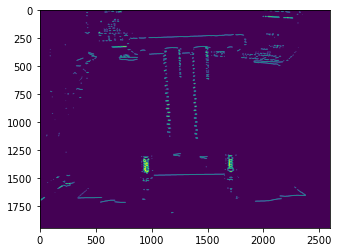

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

image = cv2.imread("calibration-images/f/output-fluid-level/images/backlight-and-flash/2023_06_20_T144847_dinolite-t-0.05-o-0.5-f-350_0.250mL.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(18, 18))
return_image = clahe.apply(gray)

cv2.imwrite("test/clahe-pre-binary.jpg", return_image)

return_image = cv2.fastNlMeansDenoising(return_image, None, 10, 7, 21)
#dst = cv2.fastNlMeansDenoising( img, None, 15, 7, 21 )  

cv2.imwrite("test/denoising.jpg", return_image)

# return_image = cv2.erode(return_image, morph_dilate_kernel_size, iterations = 3)

# cv2.imwrite("test/clahe-pre-binary-erode.jpg", return_image)

ret, binary = cv2.threshold(return_image, 190, 255, 
  cv2.THRESH_BINARY_INV)

th3 = cv2.adaptiveThreshold(cv2.medianBlur(gray,5),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11,2)

#image = cv2.cvtColor(image, cv2.COLOR_RGB2RGB)

cv2.imwrite("test/adpt-thresh-image.jpg", th3)

dst = cv2.addWeighted(return_image,0.5,binary,0.9,0)

cv2.imwrite("test/overlayed-blurred-binary.jpg", dst)

#plt.imshow(binary)

cv2.imwrite("test/binary-image.jpg", binary)

# find the contours
cv2.imwrite("test/blurred-image.jpg", blurred)

edges = cv2.Canny(binary, 50, 180)

cv2.imwrite("test/edges-denoised.jpg", edges)

plt.imshow(edges)

morph_dilate_kernel_size = (7, 7)
morph_rect_kernel_size = (6, 1)

# sigma=0.33
# median = np.median(return_image)
# # find bounds for Canny edge detection using the computed median
# lower = int(max(0, (1.0 - sigma) * median))
# upper = int(min(255, (1.0 + sigma) * median))

# print("lower:", lower, " upper:", upper)

# edges = cv2.Canny(return_image, lower, upper)

# cv2.imwrite("test/edges-clahe.jpg", edges)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
return_image = clahe.apply(edges)

cv2.imwrite("test/clahe-image.jpg", return_image)

eroded_image = cv2.erode(edges, (1,1), iterations = 1)

cv2.imwrite("test/erode-stuff.jpg", eroded_image)

return_image = cv2.morphologyEx(edges, cv2.MORPH_DILATE, morph_dilate_kernel_size, iterations = 3)

#return_image = cv2.morphologyEx(return_image, cv2.MORPH_GRADIENT, (5,5))

# create a horizontal structural element;
horizontal_structure = cv2.getStructuringElement(cv2.MORPH_RECT, morph_rect_kernel_size)
# to the edges, apply morphological opening operation to remove vertical lines from the contour image
return_image = cv2.morphologyEx(return_image, cv2.MORPH_OPEN, horizontal_structure)

#return_image = cv2.morphologyEx(return_image, cv2.MORPH_CLOSE, horizontal_structure)

cv2.imwrite("test/morpho-stuff.jpg", return_image)

# median = np.median(return_image)
# # find bounds for Canny edge detection using the computed median
# lower = int(max(0, (1.0 - sigma) * median))
# upper = int(min(255, (1.0 + sigma) * median))

# print("lower:", lower, " upper:", upper)

# edges = cv2.Canny(return_image, lower, upper)

# cv2.imwrite("test/edges-clahe-after.jpg", edges)

#print(gray.shape, wide.shape)

dst = cv2.addWeighted(gray,0.5,return_image,0.9,0)

cv2.imwrite("test/overlayed-wide.jpg", dst)

contours, _ = cv2.findContours(return_image,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

imageCopy = image.copy()

# take the first contour
max_area = 0
max_index = 0
max_height = 0
max_height_index = 0

max_ratio = 0
max_ratio_index = 0

max_width_ratio = 0
max_width_ratio_index = 0

max_width_y = 0

max_height_y = 0
min_height_y = 0

max_y = 0
max_y_index = 0

top_of_tube = 0
top_of_tube_index = 0

# Second Tube

max_height_2 = 0
max_height_index_2 = 0

max_y_2 = 0
max_y_index_2 = 0

top_of_tube_2 = 0
top_of_tube_index_2 = 0

# first tube x start = 1050, end is 1325
# second tube x start = 1325, end is 1600
tube_one_start_x = 1050
tube_one_end_x = 1325
tube_two_start_x = 1270
tube_two_end_x = 1600

min_fluid_line_width = 60

for i in range(0, len(contours)):
    
    imageCopy = image.copy()
    
    cnt = contours[i]
    
#     area = cv2.contourArea(cnt)
#     if area > max_area:
#         max_area = area
#         max_index = i

    # compute the bounding rectangle of the contour
    x,y,w,h = cv2.boundingRect(cnt)

    # draw contour
    #img = cv2.drawContours(imageCopy,[cnt],0,(0,255,255),2)

    # draw the bounding rectangle
    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        
#     # compute rotated rectangle (minimum area)
#     rect = cv2.minAreaRect(cnt)
#     box = cv2.boxPoints(rect)
#     box = np.int0(box)

#     # draw minimum area rectangle (rotated rectangle)
#     img = cv2.drawContours(imageCopy,[box],0,(0,255,255),2)
#     # compute rotated rectangle (minimum area)
#     rect = cv2.minAreaRect(cnt)
#     box = cv2.boxPoints(rect)
#     box = np.int0(box)
    
    #print("box:", box)

    # draw minimum area rectangle (rotated rectangle)
    #img = cv2.drawContours(img,[box],0,(0,255,255),2)
    
    # First Tube
    if y > top_of_tube and y < 400 and y > 250 and x > tube_one_start_x and x < tube_one_end_x and w > 20:
        top_of_tube = y
        top_of_tube_index = i
    
    if y > max_y and y > 300 and x > 100 and y < 1400 and w > min_fluid_line_width and x > tube_one_start_x and x < tube_one_end_x:
        max_y = y
        max_y_index = i
    
    if y > max_height and y > 300 and y < 1480 and x > tube_one_start_x and x < tube_one_end_x and w > 20:
        max_height = y
        max_height_index = i
        
    # Second Tube
    if y > top_of_tube_2 and y < 400 and y > 250 and x > tube_two_start_x and x < tube_two_end_x and w > 20:
        top_of_tube_2 = y
        top_of_tube_index_2 = i
    
    if y > max_y_2 and y > 300 and x > 100 and y < 1400 and w > min_fluid_line_width  and x > tube_two_start_x and x < tube_two_end_x:
        max_y_2 = y
        max_y_index_2 = i
    
    if y > max_height_2 and y > 300 and y < 1480 and x > tube_two_start_x and x < tube_two_end_x and w > 20:
        max_height_2 = y
        max_height_index_2 = i
        
#     if h/w > max_ratio and h > 200 and area > 10:
#         max_ratio = h/w
#         max_ratio_index = i
#         max_height_y = y+h
#         min_height_y = y
        
#     if w/h > max_width_ratio and w > 300:
#         max_width_ratio = h/w
#         max_width_ratio_index = i
#         max_width_y = y+h
    
    # display the image with bounding rectangle drawn on it
    #plt.imshow(img)

    #cv2.imwrite("bounded.jpg", img)

    #print(y+h)
    
# Tube One

# TODO: Handle zero volume

bottom_y = max_height
bottom_y_index = max_height_index
#print(max_area, max_index)
print("bottom:", bottom_y, bottom_y_index)
#print(max_ratio, max_ratio_index)
#print(max_width_ratio, "index:", max_width_ratio_index)
#print("y coordinate of top edge of holder:", max_width_y, " top of fluid level y:", max_height_y, " bottom of fluid level:", min_height_y)
print("top of fluid level:", max_y, max_y_index)

print("top of tube:", top_of_tube, top_of_tube_index)

tube_one_indices = (bottom_y_index, max_y_index, top_of_tube_index)

# Tube Two
bottom_y_2 = max_height_2
bottom_y_index_2 = max_height_index_2
#print(max_area, max_index)
print("bottom 2:", bottom_y_2, bottom_y_index_2)
#print(max_ratio, max_ratio_index)
#print(max_width_ratio, "index:", max_width_ratio_index)
#print("y coordinate of top edge of holder:", max_width_y, " top of fluid level y:", max_height_y, " bottom of fluid level:", min_height_y)
print("top of fluid level 2:", max_y_2, max_y_index_2)

print("top of tube 2:", top_of_tube_2, top_of_tube_index_2)

tube_two_indices = (bottom_y_index_2, max_y_index_2, top_of_tube_index_2)

# tube_height = max_height_y - max_width_y

# rel_height = min_height_y / tube_height

# print(tube_height, rel_height)

plt.imshow(return_image)

full_volume = 13.5 # mL
full_volume_2 = 13 # mL

print("Tube one:")
calculate_volume(max_y, bottom_y, top_of_tube, full_volume)
print("Tube two:")
calculate_volume(max_y_2, bottom_y_2, top_of_tube_2, full_volume_2)

box: [[ 681 2340]
 [ 730 1148]
 [ 805 1151]
 [ 755 2343]]


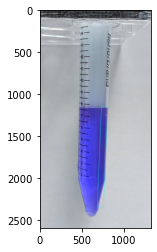

In [49]:
cnt = contours[81]

imageCopy = image.copy()

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

# draw minimum area rectangle (rotated rectangle)
img = cv2.drawContours(imageCopy,[box],0,(0,255,255),2)
# compute rotated rectangle (minimum area)
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

print("box:", box)

# draw minimum area rectangle (rotated rectangle)
img = cv2.drawContours(img,[box],0,(0,255,255),2)
plt.imshow(img)

True

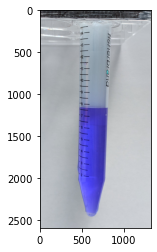

In [43]:
imageCopy = image.copy()

cnt = contours[114]

# compute rotated rectangle (minimum area)
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

# draw minimum area rectangle (rotated rectangle)
img = cv2.drawContours(imageCopy,[box],0,(0,255,255),2)
    # compute rotated rectangle (minimum area)
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

# draw minimum area rectangle (rotated rectangle)
img = cv2.drawContours(img,[box],0,(0,255,255),2)

# display the image with bounding rectangle drawn on it
plt.imshow(img)
cv2.imwrite("bounded.jpg", img)

# 